## Predicting heart-disease using Machine learning

## 1. Problem definition 
## 2. Data
## 3. Evaluation
## 4. Featrures
## 5. Modelling
## 6. Experimentation

In [53]:

# import the tools needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline    

#model evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


## LOAD DATA

In [3]:
df=pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape  #rows, columns

(303, 14)

## DATA EXPLORATION

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

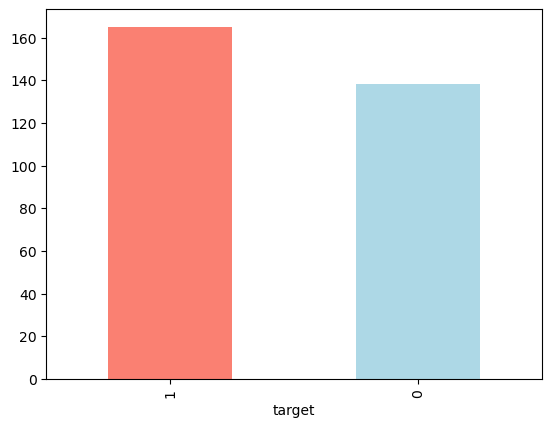

In [7]:
df["target"].value_counts().plot(kind="bar", color=["Salmon", "lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency to sex

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

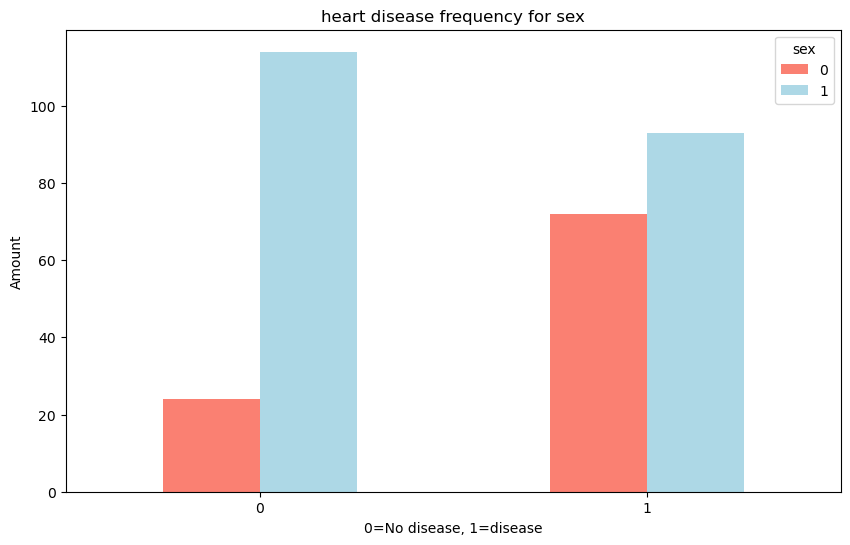

In [9]:
# create aplot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                     figsize=(10, 6),
                                     color=["salmon", "lightblue"])
plt.title("heart disease frequency for sex")
plt.xlabel("0=No disease, 1=disease")
plt.ylabel("Amount")
plt.xticks(rotation=0)

## Age vs. Max heart rate for heart disease`

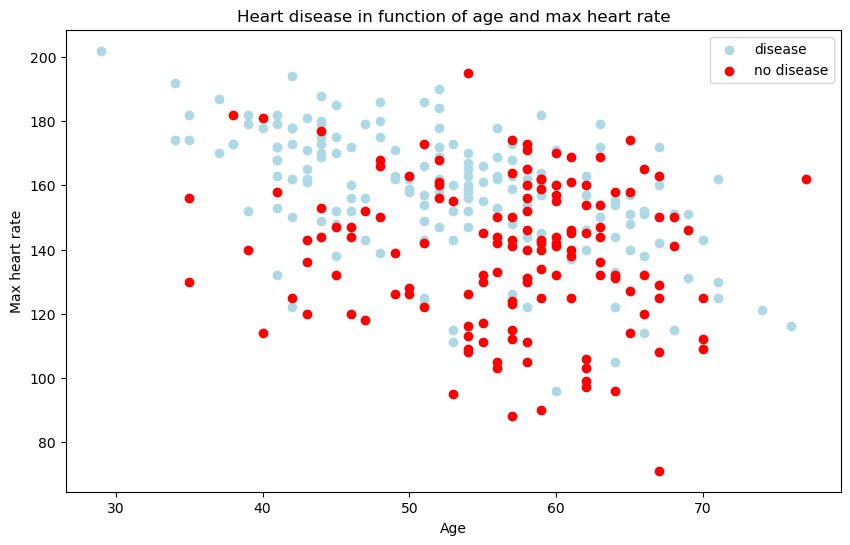

In [10]:
# create another figure
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="lightblue")
# scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="red")

plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["disease", "no disease"])

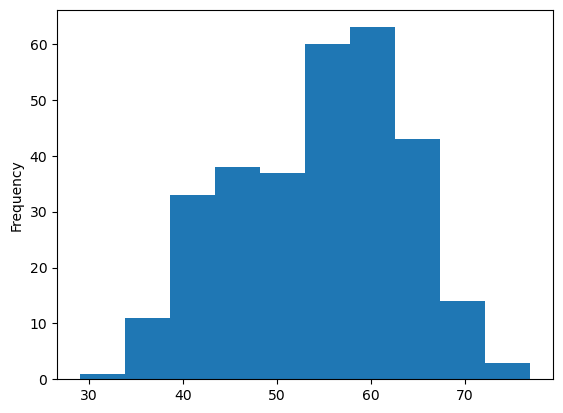

In [22]:
df.age.plot.hist();

In [11]:
## Heart disease frequency per chest pain type

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

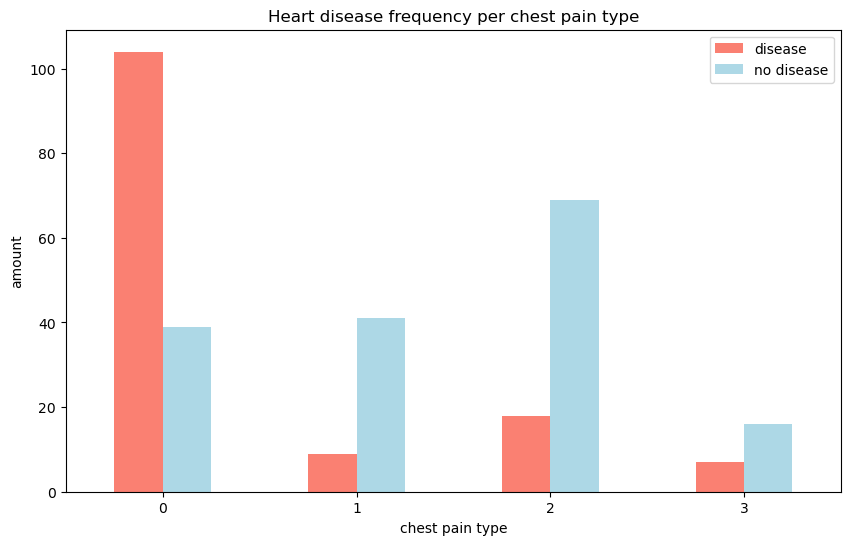

In [24]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"])

plt.title("Heart disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["disease", "no disease"])
plt.xticks(rotation=0)

In [25]:
# Make a correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


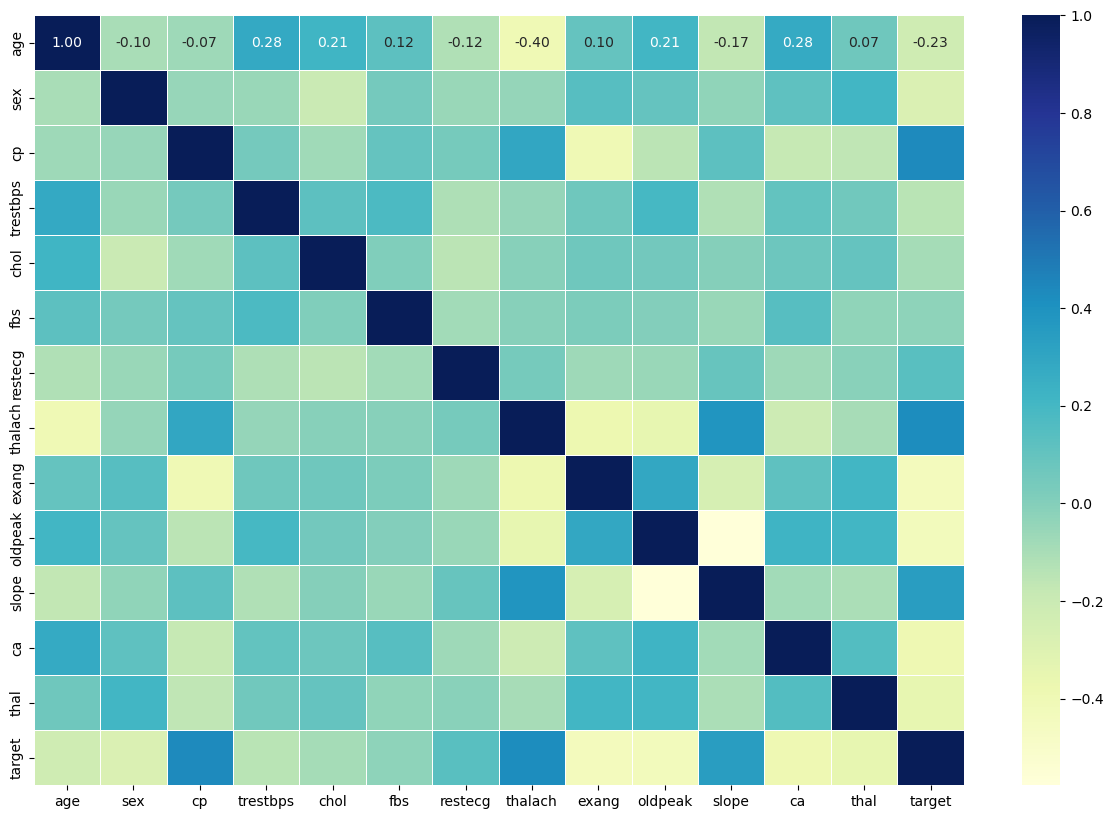

In [12]:
# correlation matrix visualizing

corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu");

 ## Modelling

In [13]:
# Split data into x and y

x=df.drop("target", axis=1)
y=df["target"]

In [6]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [7]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# split data into train and test set
from sklearn.model_selection import train_test_split
np.random.seed(42)

x_train, x_test, y_train, y_test=train_test_split(x,
                                                  y,
                                                  test_size=0.2)


In [16]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [15]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

# Data has been split into training and test sets, now create ML model
## Train it(finding patterns) on training set
## Test it on test set

## ------------------------------------------------------------------

## 3 different ML model:
## 1. logistic regression
## 2. K-Nearest Neighbour Classifier
## 3. Random Forest Classifier

In [17]:
# Put models in a dictionary
models= {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    fits and evaluates given ML models.
    models: a dictionary of scikit learn ml  models
    x_train: training data
    x_test: testing data
    y_train: training labels
    y_test:test labels
    """

    # set random seed
    np.random.seed(42)
    #make a dictionary to keep  model score
    model_score= {}
    # loop thru models
    for name, model in models.items():

        #fit the model
        model.fit(x_train, y_train)
        #evaluate
        model_score[name]=model.score(x_test, y_test)
    return model_score

In [18]:
model_score=fit_and_score(models=models,
                          x_train=x_train,
                          x_test=x_test,
                          y_train=y_train,
                          y_test=y_test)
model_score

C:\Users\Lenovo\sample_project\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model comparison

<Axes: >

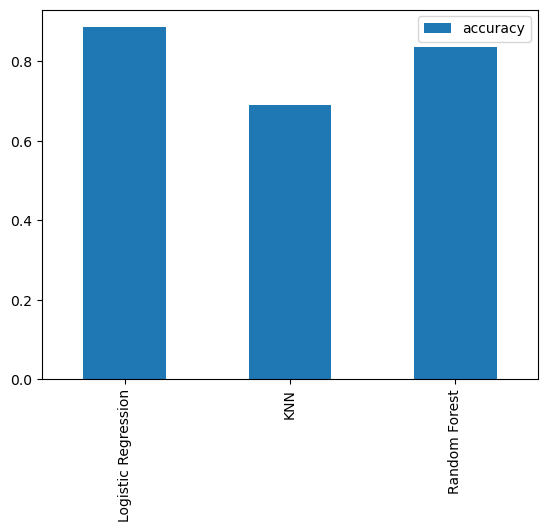

In [36]:
model_compare=pd.DataFrame(model_score, index=["accuracy"])
model_compare.T.plot.bar()

In [37]:
## Tuning KNN

train_scores=[]
test_scores=[]

#create list of diff values for n_neighbors
neighbors=range(1,21)

# setup KNN instance
knn=KNeighborsClassifier()

#loop through diff n_neighbor
for i in neighbors:
    knn.set_params(n_neighbors=i)


    # fit
    knn.fit(x_train, y_train)

    #update training scores list
    train_scores.append(knn.score(x_train, y_train))

    #update test scores
    test_scores.append(knn.score(x_test, y_test))

In [38]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [39]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Mximim KNN score on test data: 75.409836%


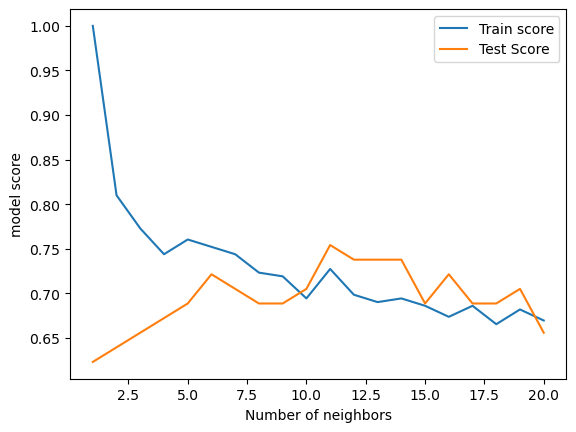

In [42]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("model score")

plt.legend()

print(f"Mximim KNN score on test data: {max(test_scores)*100:2f}%")

## Hyperparamter tuning with RandomizedSearchCV

we are going to tune 
*LogisticRegression
*RandoForestClassifier
using randomizedsearchcv

# create a hyperparameter grid for logisticregression

In [44]:
log_reg_grid={"C": np.logspace(-4,4,20),
"solver": ["liblinear"]}

In [45]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [28]:

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [51]:
# Tune logisticregression 
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

#setup random hyperparameter search for logisticregression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

#fit
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [52]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [53]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [37]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.8688524590163934

In [38]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [39]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Hyperparameterss tuning with GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV
log_reg_grid={"C": np.logspace(-4,4,30),
              "solver":["liblinear"]}
# setup grid hyperparamter search for logisticregression
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
#fit
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [44]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Evaluate our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score


In [47]:
# making predictions

y_preds=gs_log_reg.predict(x_test)

In [48]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [49]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

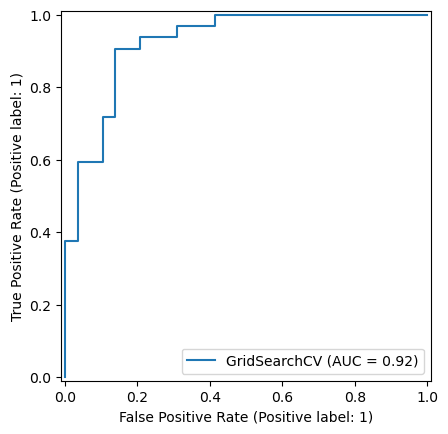

In [57]:
#plot ROC curve
#already imported roc curve
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=x_test, 
                               y=y_test); 

In [58]:
# confusion matrix

print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


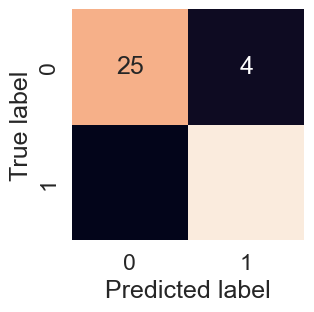

In [65]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test, y_preds),
    annot=True,
    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test, y_preds)

In [66]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



##  Calculate evaluation metrics using cross-validation

## crossvalscore

In [67]:
# check best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [69]:
# create a new classifier with best parameters
clf=LogisticRegression(C= 0.20433597178569418, 
                        solver="liblinear")

In [72]:
# cross validated accuracy
from sklearn.model_selection import cross_val_score

cv_acc=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [73]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [77]:
#cross validated precision
cv_pre=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="precision")
cv_pre
cv_pre=np.mean(cv_pre)
cv_pre

0.8215873015873015

In [80]:
#cross validated recall
cv_rcall=cross_val_score(clf,
                         x,
                         y,
                         scoring="recall")
cv_rcall=np.mean(cv_rcall)
cv_rcall

0.9272727272727274

In [83]:
# cross validated f1-score
cv_f1=cross_val_score(clf,
                      x,
                      y,
                      scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

# visualize cross validated metrices

<Axes: title={'center': 'Cross-Validated Classification Metrices'}>

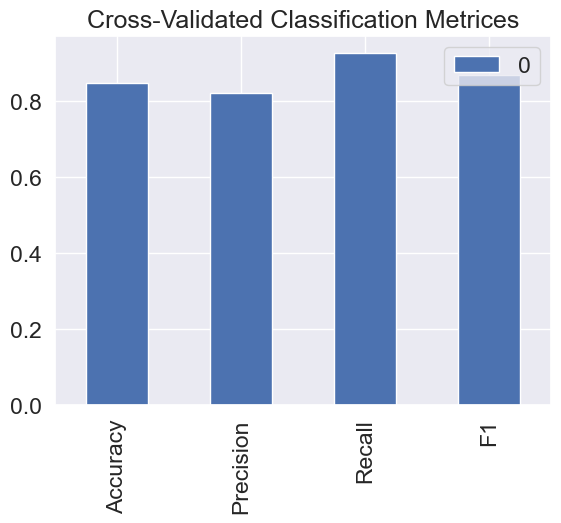

In [84]:
cv_metrics=pd.DataFrame({"Accuracy": cv_acc,
                         "Precision":cv_pre,
                         "Recall":cv_rcall,
                         "F1":cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrices")

## Feature importance

In [87]:
# Fit an instance of LogisticRegression

clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [86]:
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [91]:
feature_dict=dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

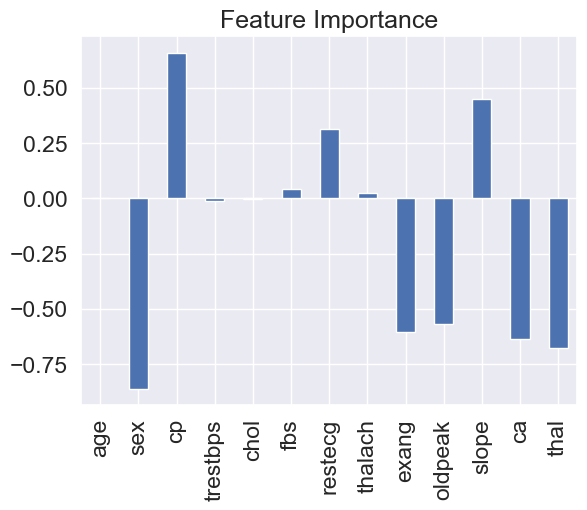

In [94]:
#visualize
feature_df=pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);